In [1]:
import numpy as np
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
import matplotlib as mpl
import mplhep 

In [2]:
#2D logarithmically spaced bins in Q2 and 𝑥 for analysis

Q2_midpoints = [0.515,0.815,1.29,2.05,3.25,5.15,8.15,12.9,20.5,32.5,51.5,81.5,129,205,325,515,815,1.29E+03,2.05E+03,3.25E+03,5.15E+03]
Q2_bins = [0.40938507,0.64786184,1.025353587,1.626191868,2.581181894,4.091148983,6.478618696,10.25353599,16.26191868,25.81181894,40.91148983,64.78618696,102.5353599,162.6191868,258.1181894,409.1148983,647.8618696,1025.353599,1626.191868,2581.181894,4091.148983,6482.897648]

x_midpoints = [5.15E-05,8.15E-05,0.000129,0.000205,0.000325,0.000515,0.000815,0.00129,0.00205,0.00325,0.00515,0.00815,0.0129,0.0205,0.0325,0.0515,0.0815,0.129,0.205,0.325,0.515,0.815]
x_bins = [4.09385E-05,6.47862E-05,0.000102535,0.000162619,0.000258118,0.000409115,0.000647862,0.001025354,0.001626192,0.002581182,0.004091149,0.006478619,0.010253536,0.016261919,0.025811819,0.04091149,0.064786187,0.10253536,0.162619187,0.25811819,0.409114898,0.647861868,1.025257131]

# Asymmetry

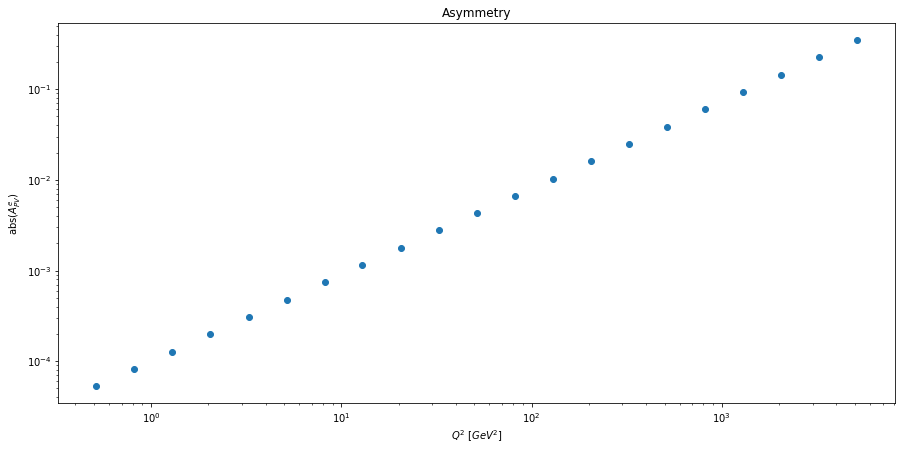

In [3]:
Q_midpoints = np.power(Q2_midpoints,0.5)
A = 0.0001 * (((Q_midpoints))**1.9079)

fig = plt.figure()
plt.xlabel('$Q^2$ [$GeV^2$]')
plt.ylabel('abs($A^e_{PV}$)')
plt.title('Asymmetry')
plt.scatter(Q2_midpoints,A)
plt.yscale('log')
plt.xscale('log')
fig.set_figheight(7)
fig.set_figwidth(15)
plt.show()


# Correlation

In [4]:
#Q2 correlation 
def Q2correlation(minQ2,method): #minQ2 can be either 1,10,100, or 1000 #method can be either 'E','DA', or 'JB'

    Q2values_Y = method_Q2values_dict['{}'.format(method)]  #Q2 values of the given method, that are mapped onto the y axis 
    
    Q2_List_T = Q2values_T['{}'.format(minQ2)] #Truth Q2 values for given minQ2 #mapped along x axis
    Q2_List_Y = Q2values_Y['{}'.format(minQ2)] #given method's Q2 values for given minQ2 #mapped along y axis

    T_len = ak.count(Q2_List_T,axis=0) #total number of events in Truth
    Y_len = ak.count(Q2_List_Y,axis=0) #total number of events in method

    if T_len > Y_len: #if total number of events for Truth is greater
        Y_boolean = ak.count(Q2_List_Y,axis=-1) >= 1 #boolean to filter ak.Arrays wrt single events in method 
        Q2_List_T_F = Q2_List_T[Y_boolean] #filtered Truth Q2 values
        Q2_List_Y_F = Q2_List_Y[Y_boolean] #filtered method Q2 values
    else: #if total number of events for method is greater
        T_boolean = ak.count(Q2_List_T,axis=-1) >= 1 #boolean to filter ak.Arrays wrt single events in Truth
        Q2_List_T_F = Q2_List_T[T_boolean] #filtered Truth Q2 values
        Q2_List_Y_F = Q2_List_Y[T_boolean] #filtered method Q2 values
    
    T_Q2s = ak.flatten(Q2_List_T_F)
    Y_Q2s = ak.flatten(Q2_List_Y_F)
    
    #hist2d plot i.e. h:
    fig = plt.figure()
    (h, xedges, yedges, image) =plt.hist2d(x=T_Q2s,y=Y_Q2s, bins=[Q2_bins,Q2_bins],norm=mpl.colors.LogNorm()) 
    plt.close()

    minQ2_dict = {'1':2,'10':7,'100':12,'1000':17} #Q2 bin index at which minQ2 starts
    h[0:minQ2_dict['{}'.format(minQ2)]]=0 #ignore values before minQ2

    #normalization of h:
    col_sum = ak.sum(h,axis=-1) #number of events in each (verticle) column 
    norm_h = [] #norm_h is the normalized matrix
    norm_h_text = [] #display labels matrix
    for i in range(len(col_sum)):
        alpha = h[i]/col_sum[i] #column/sum of the column
        norm_h.append(alpha)
        alpha2 = [ '%.3f' % elem for elem in alpha ] #display value to 3 dp
        norm_h_text.append(alpha2)
    
    fig = plt.figure()
    mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=Q2_bins,ybins=Q2_bins,cmax=1,cmin=1e-5)
    plt.yscale('log')
    plt.xscale('log')
    fig.set_figwidth(11)
    fig.set_figheight(11)
    plt.xlabel('$Q^2$ [$GeV^2$] Truth')
    plt.ylabel('$Q^2$ [$GeV^2$] {}'.format(method_dict['{}'.format(method)]))
    plt.title('{}   $Q^2$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(method_dict['{}'.format(method)],k,p,minQ2))
    plt.show()

In [5]:
#Bjorken-x correlation 
def Xcorrelation(minQ2,method): #minQ2 can be either 1,10,100, or 1000. method can be either 'E','DA', or 'JB'.

    Xvalues_Y = method_Xvalues_dict['{}'.format(method)] #x values of the given method, that are mapped onto the y axis 
        
    X_List_T = Xvalues_T['{}'.format(minQ2)] #Truth x values for given minQ2 #mapped along x axis
    X_List_Y = Xvalues_Y['{}'.format(minQ2)] #given method's x values for given minQ2 #mapped along y axis

    T_len = ak.count(X_List_T,axis=0) #total number of events in Truth
    Y_len = ak.count(X_List_Y,axis=0) #total number of events in method

    if T_len > Y_len: #if total number of events for Truth is greater
        Y_boolean = ak.count(X_List_Y,axis=-1) >= 1 #boolean to filter ak.Arrays wrt single events in method 
        X_List_T_F = X_List_T[Y_boolean] #filtered Truth x values
        X_List_Y_F = X_List_Y[Y_boolean] #filtered method x values
    else: #if total number of events for method is greater
        T_boolean = ak.count(X_List_T,axis=-1) >= 1 #boolean to filter ak.Arrays wrt single events in Truth
        X_List_T_F = X_List_T[T_boolean] #filtered Truth x values
        X_List_Y_F = X_List_Y[T_boolean] #filtered method x values
    T_Xs = ak.flatten(X_List_T_F)
    Y_Xs = ak.flatten(X_List_Y_F)
    
    T_x_bool = T_Xs>=minQ2/(4*k*p) #boolean to filter x values that satisfy bjorken-x equation with minQ2
    T_Xs = T_Xs[T_x_bool]
    Y_Xs = Y_Xs[T_x_bool]
    
    #hist2d plot i.e. h:
    fig = plt.figure()
    (h, xedges, yedges, image) =plt.hist2d(x=T_Xs,y=Y_Xs, bins=[x_bins,x_bins],norm=mpl.colors.LogNorm())
    plt.close()
    
    #normalization of h:
    col_sum = ak.sum(h,axis=-1) #number of events in each (verticle) column 
    norm_h = [] #norm_h is the normalized matrix
    norm_h_text = [] #display labels matrix
    for i in range(len(col_sum)):
        alpha = h[i]/col_sum[i] #column/sum of the column
        norm_h.append(alpha)
        alpha2 = [ '%.2f' % elem for elem in alpha ] #display value to 2 dp
        norm_h_text.append(alpha2)

    fig = plt.figure()
    mplhep.hist2dplot(H=norm_h,norm=mpl.colors.LogNorm(),labels=norm_h_text,xbins=x_bins,ybins=x_bins,cmax=1,cmin=1e-5)
    plt.yscale('log')
    plt.xscale('log')
    fig.set_figwidth(11)
    fig.set_figheight(11)
    plt.xlabel('x Truth')
    plt.ylabel('$x$   {}'.format(method_dict['{}'.format(method)]))
    plt.title('{}   $x$ correlation   {}x{}   $minQ^2=${}$GeV^2$'.format(method_dict['{}'.format(method)],k,p,minQ2))
    plt.show()

<ipython-input-4-4338cf3296bb>:37: RuntimeWarning: invalid value encountered in true_divide
  alpha = h[i]/col_sum[i] #column/sum of the column


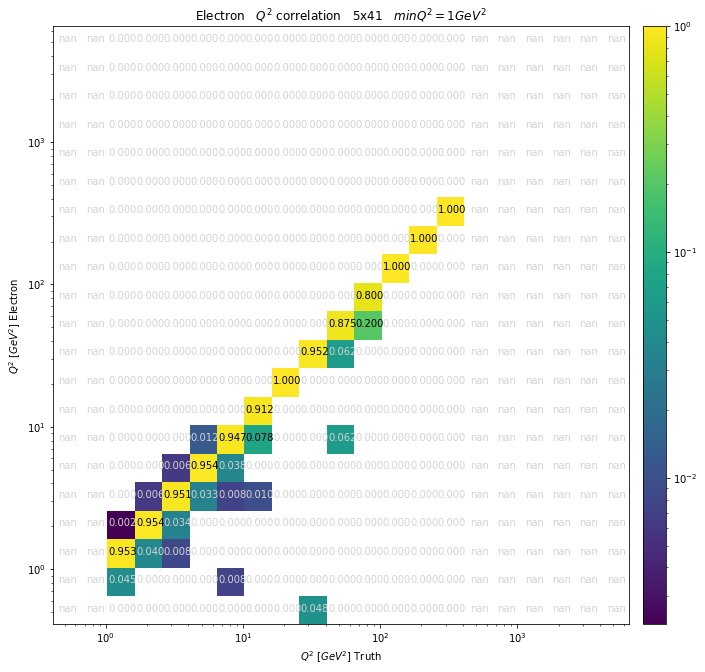

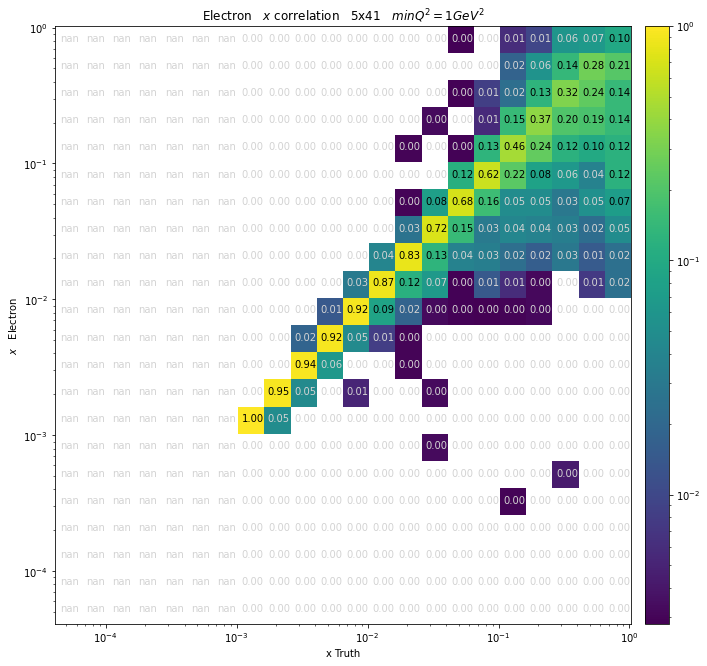

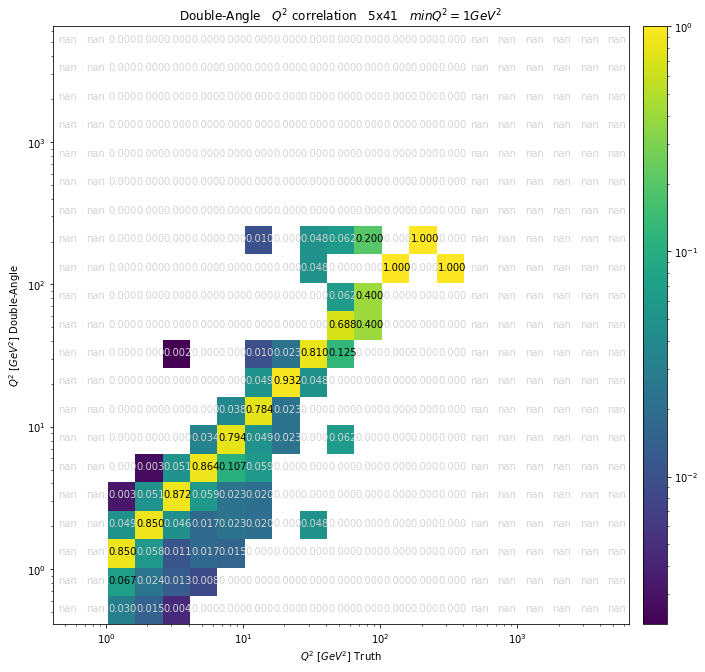

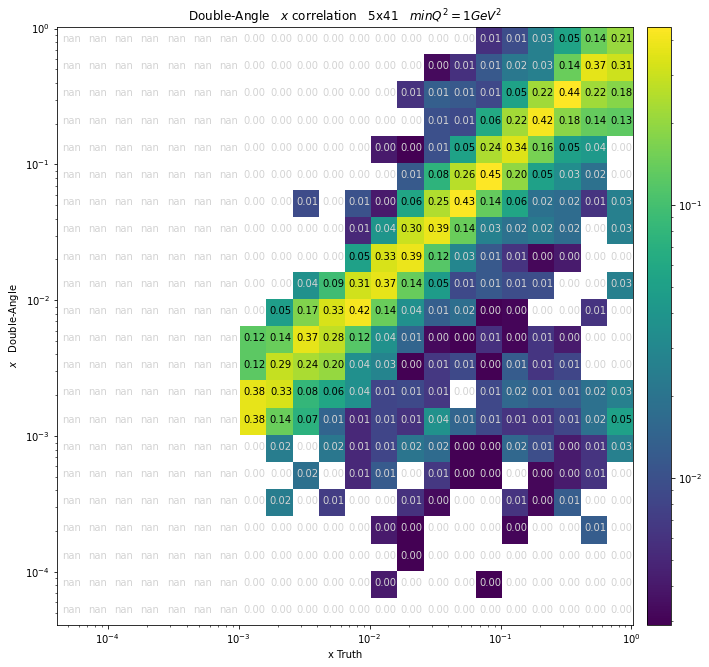

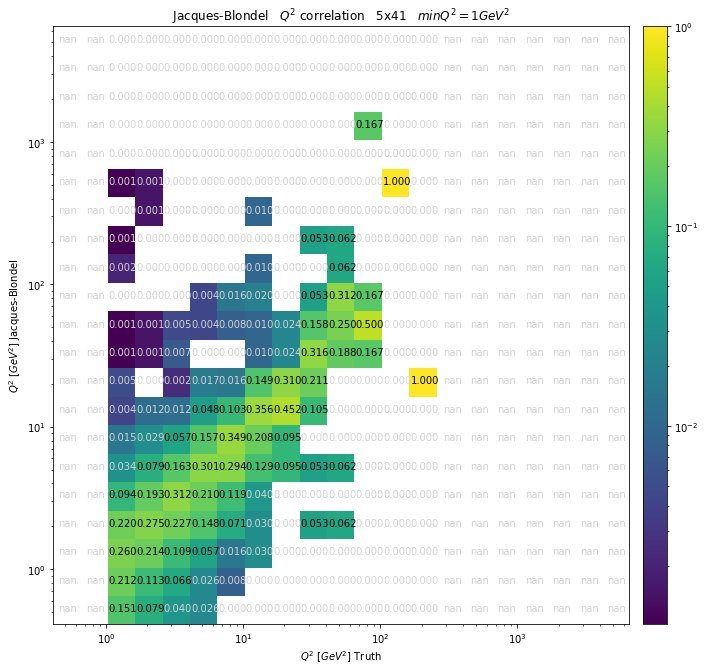

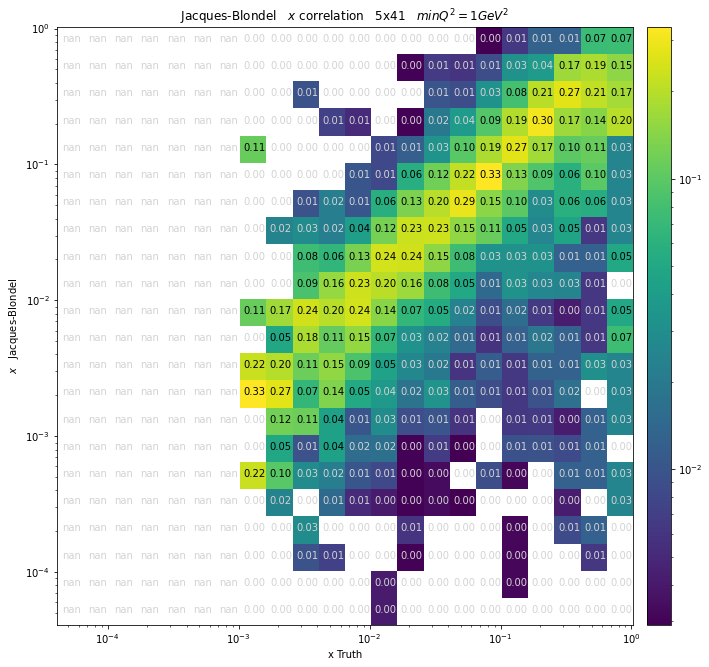

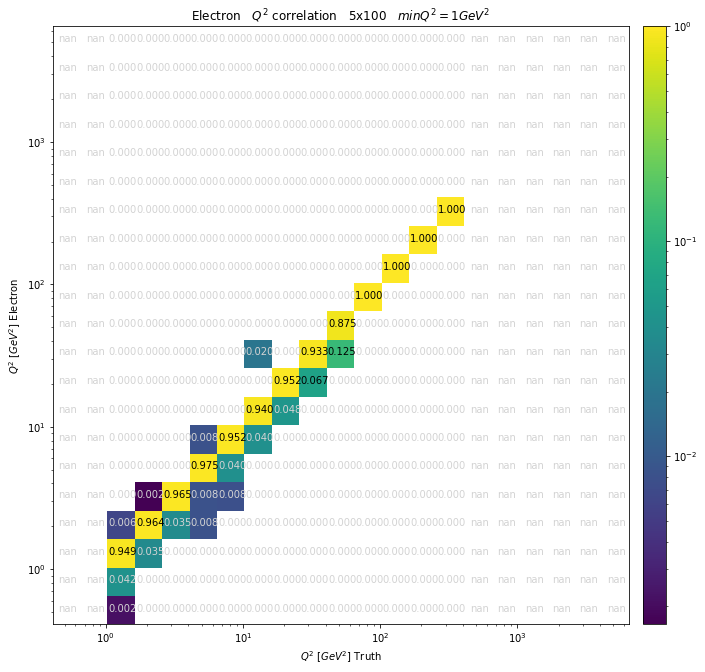

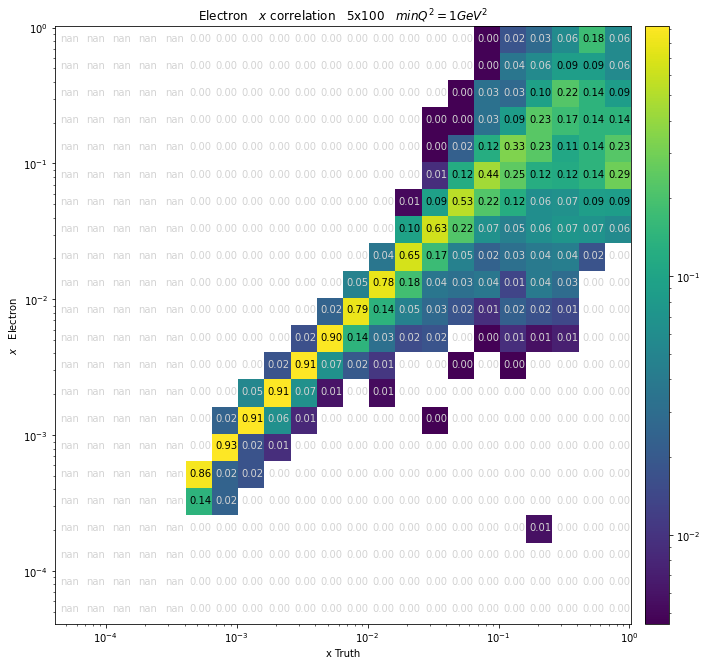

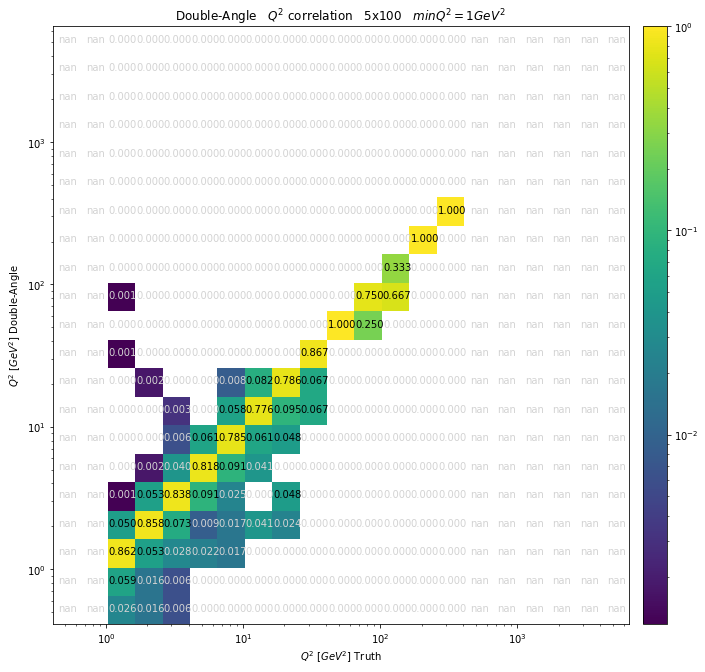

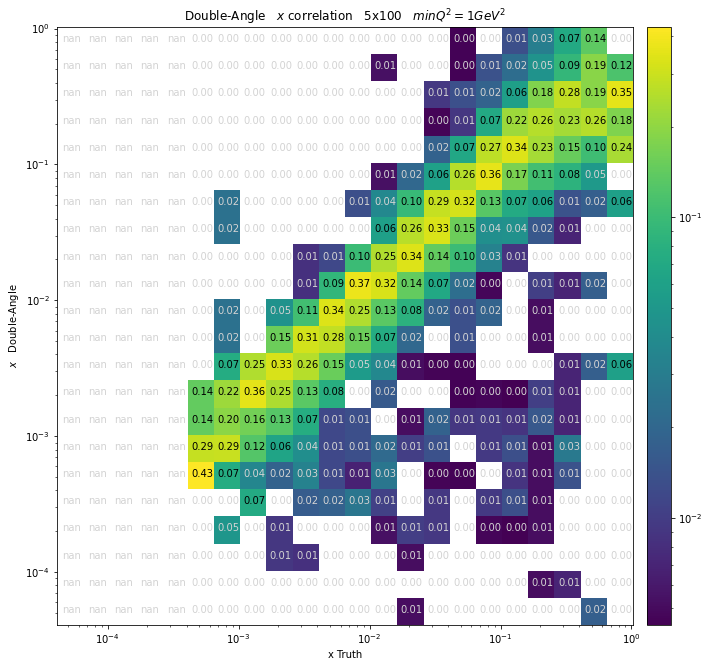

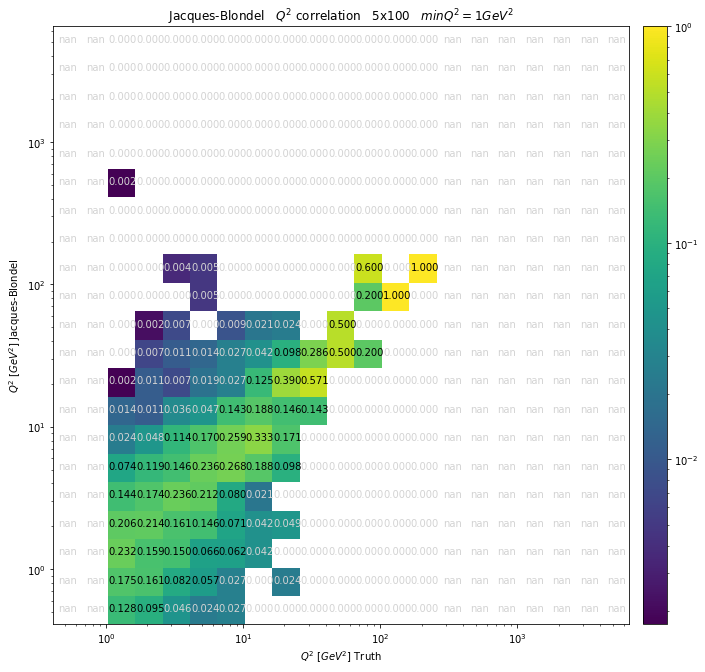

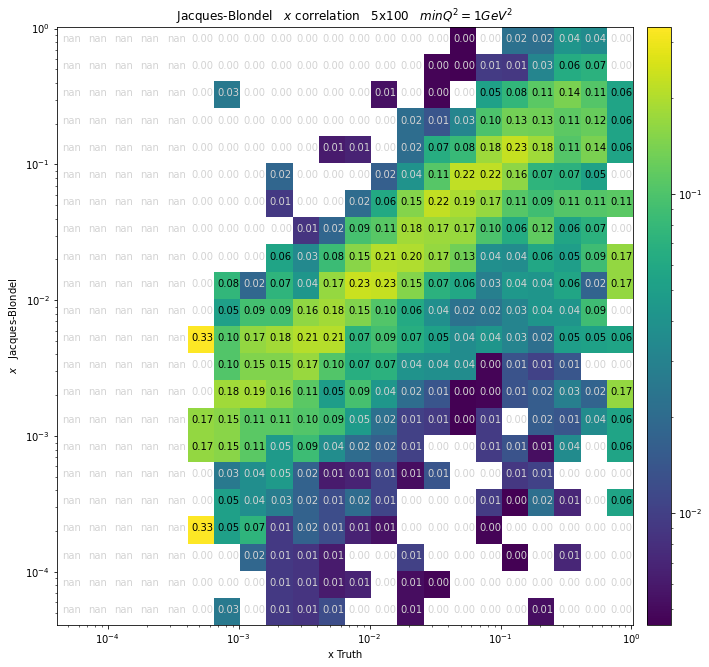

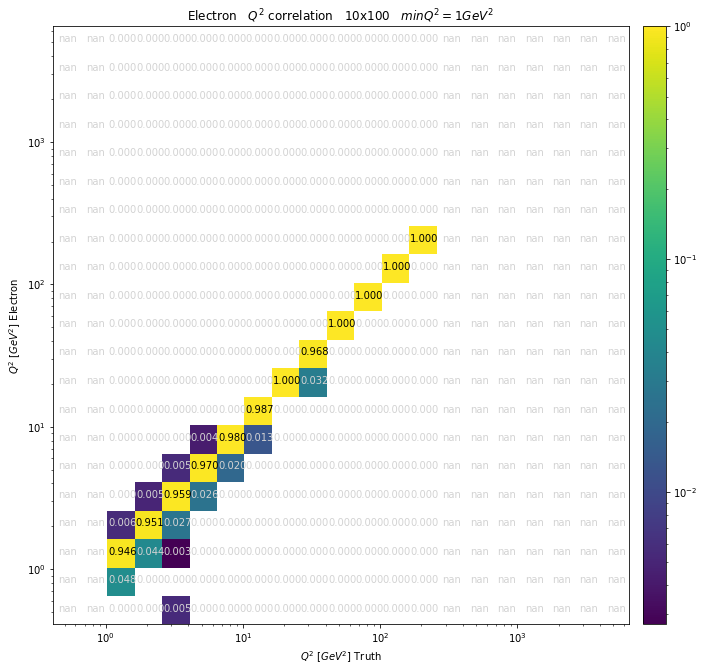

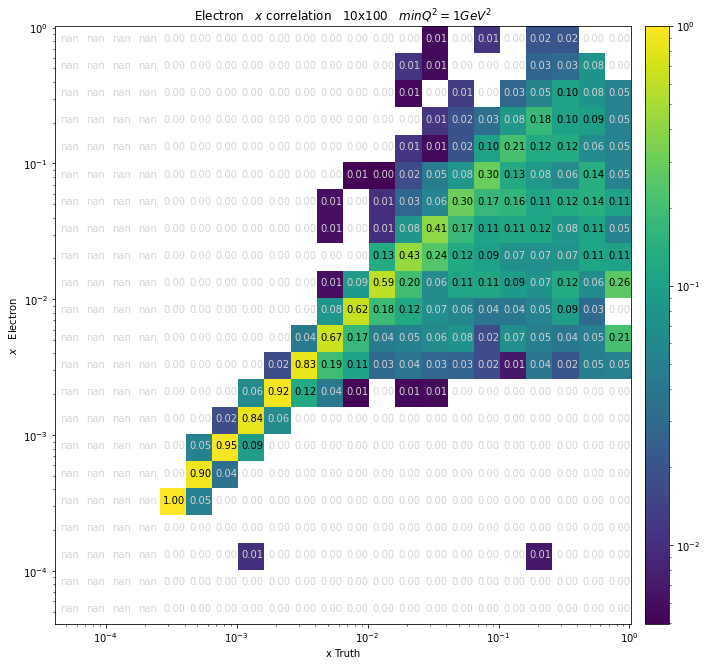

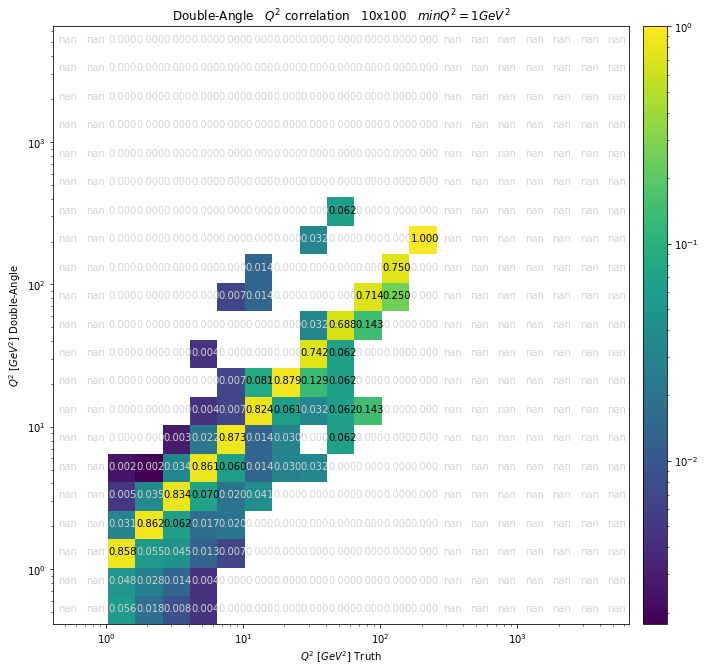

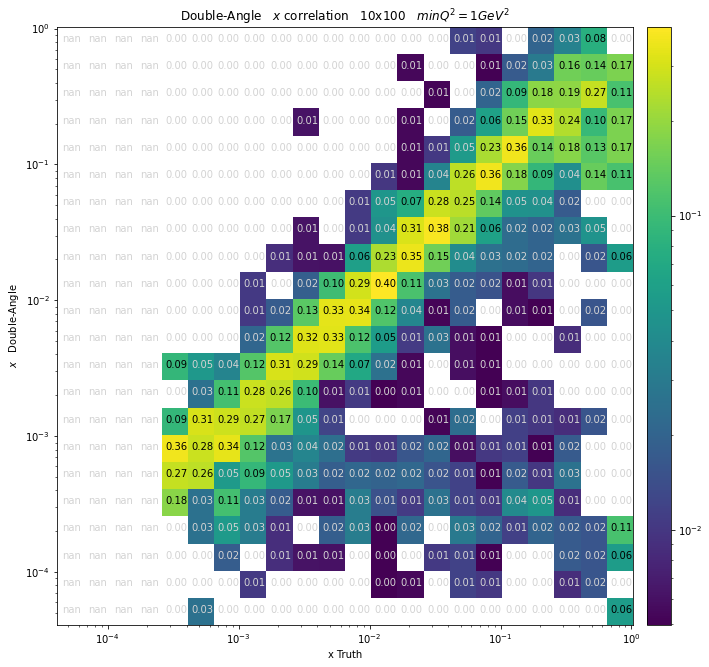

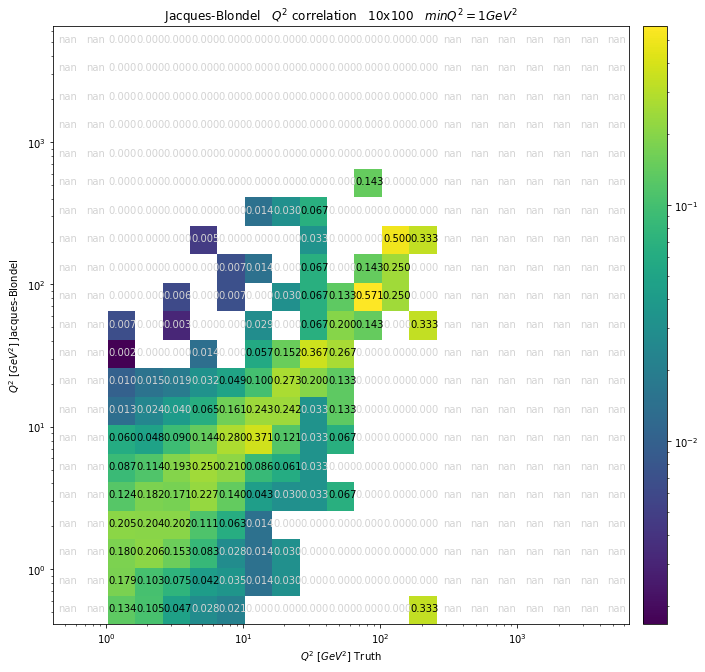

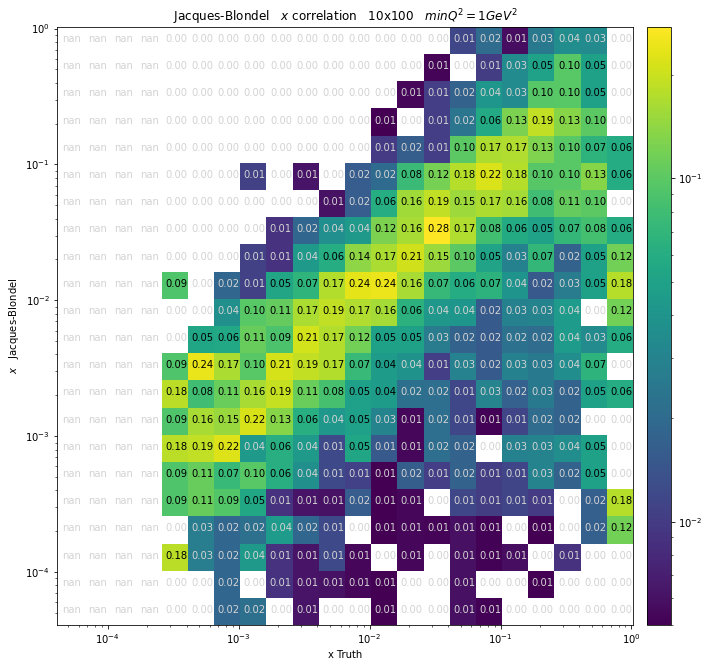

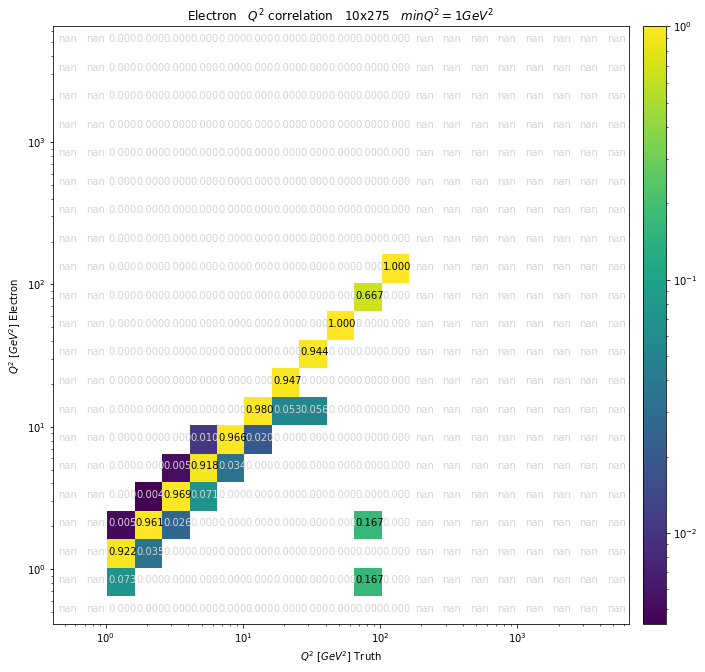

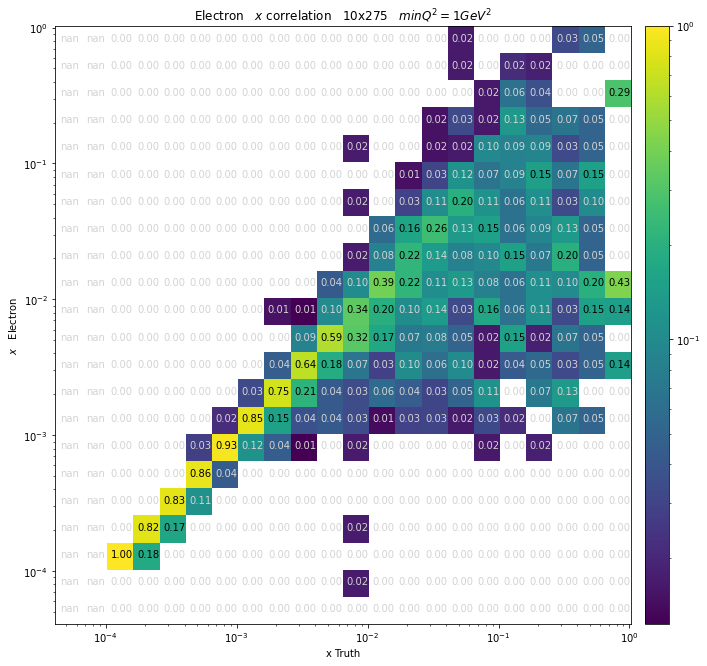

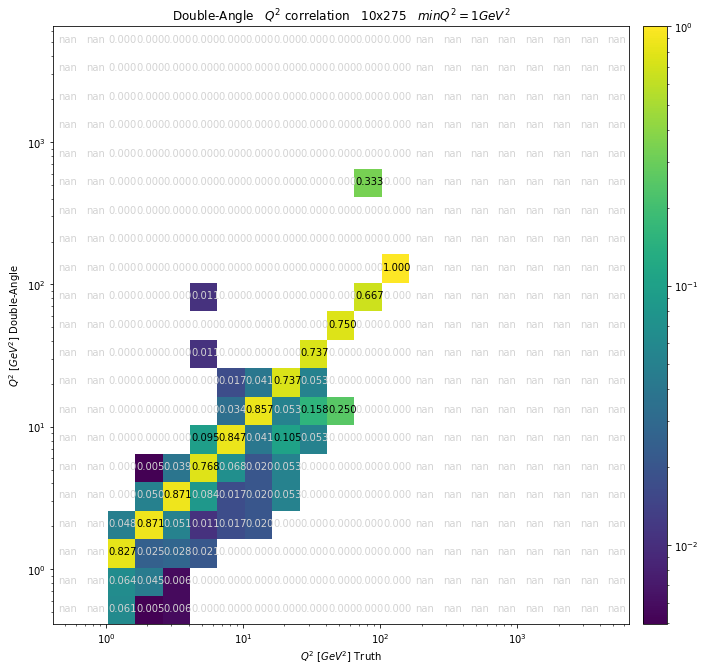

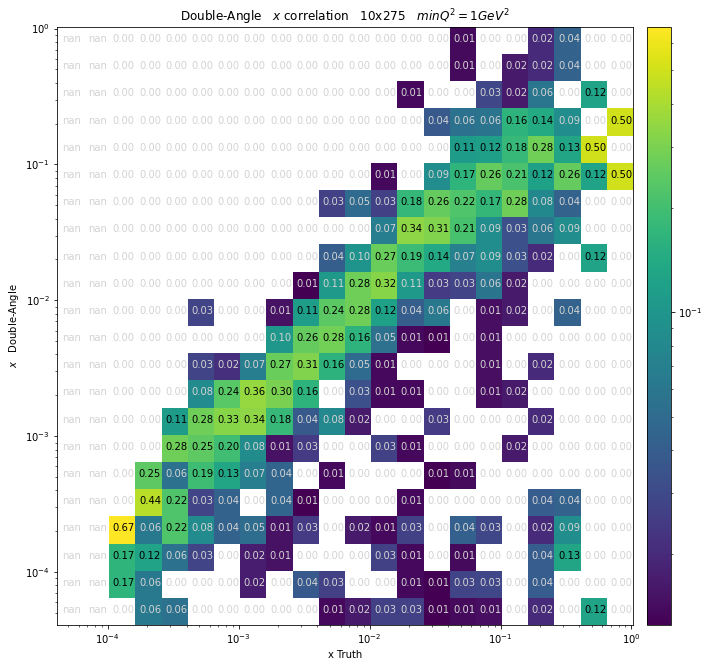

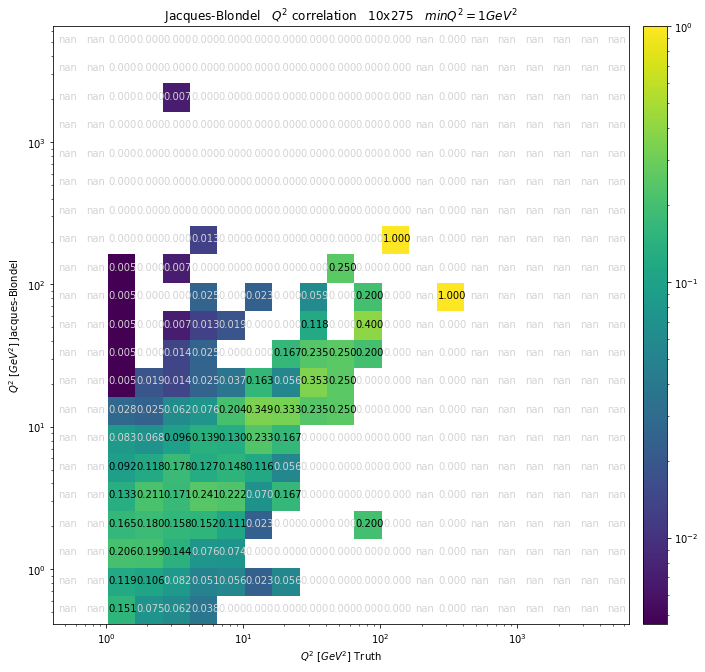

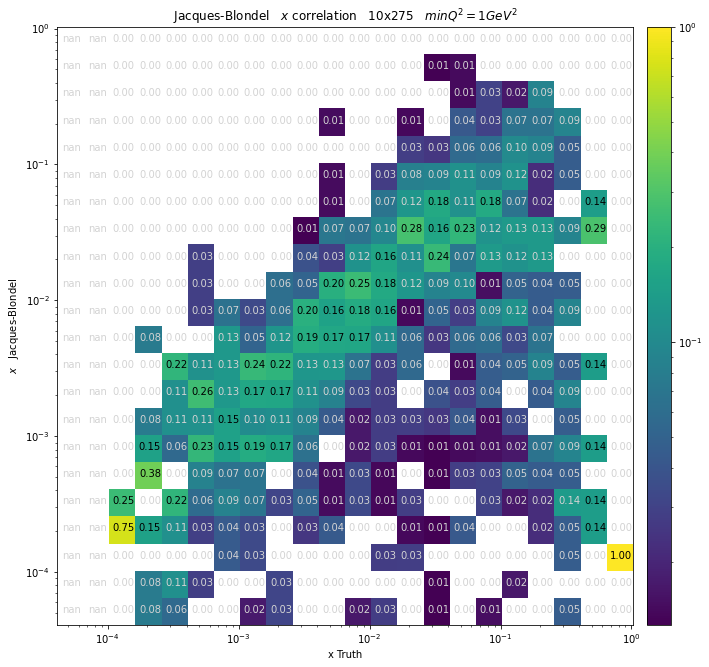

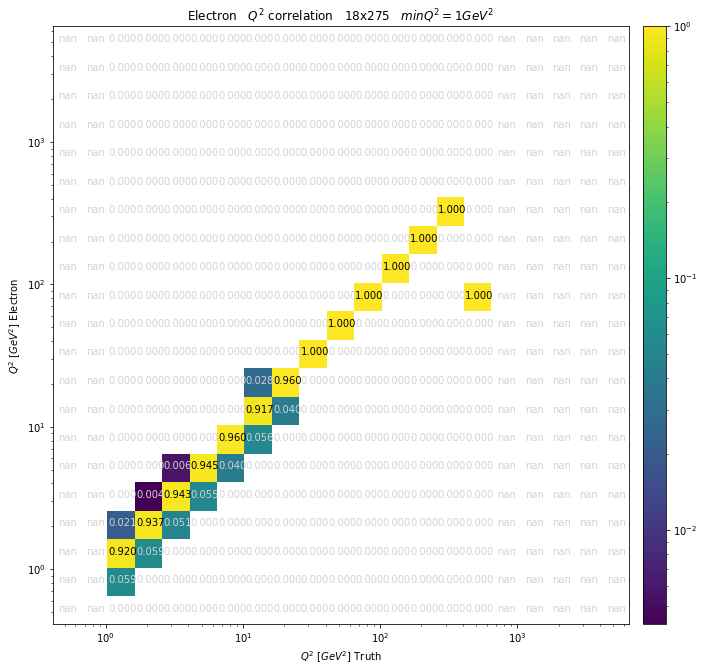

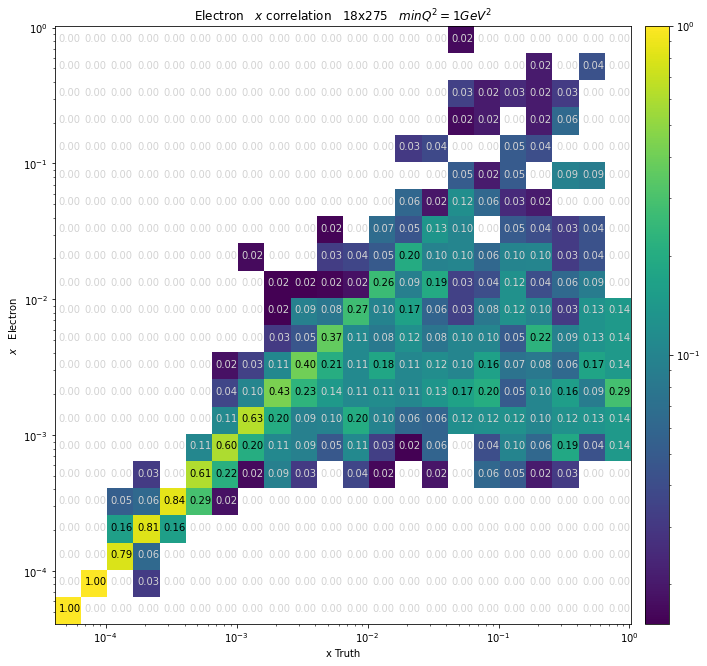

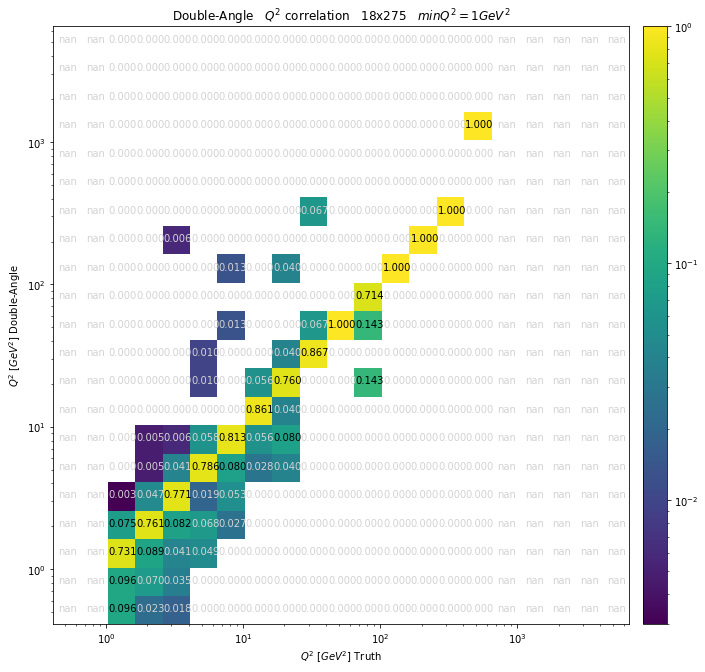

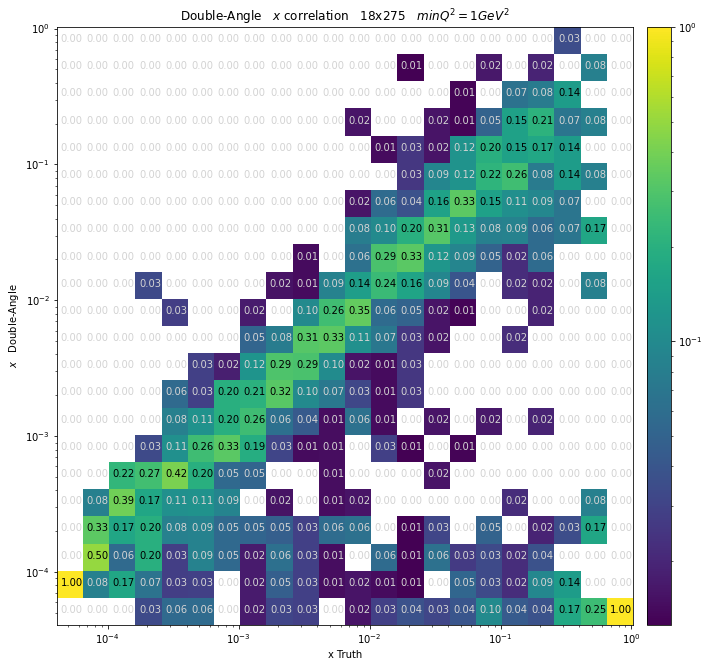

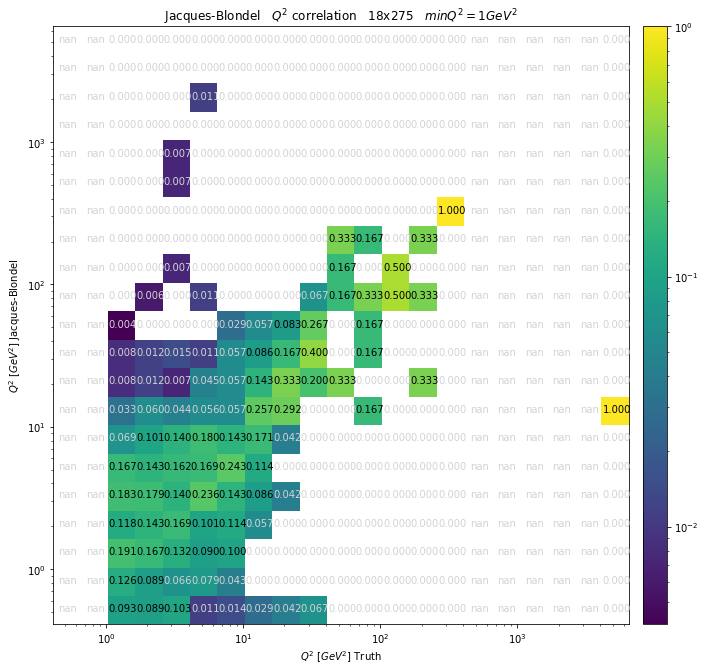

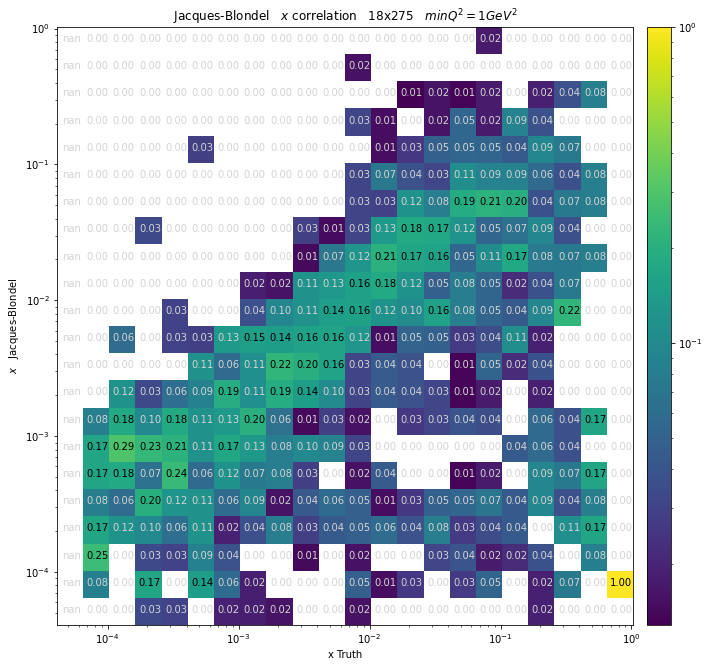

In [6]:
k_list = [5,5,10,10,18] # electron momentum
p_list = [41,100,100,275,275] # proton momentum
minQ2 = 1

for i in range(len(k_list)):
    k = k_list[i]
    p = p_list[i]

    server = '~/projects/def-wdconinc/tooba/deathvalley/{}x{}/minQ2={}/'.format(k,p,minQ2)
    file = 'pythia8NCDIS_{}x{}_minQ2={}_beamEffects_xAngle=-0.025_hiDiv_vtxfix_1_000.0001.root:events/'.format(k,p,minQ2)
    keys = ur.concatenate(server + file + 'InclusiveKinematicsTruth')

    minQ2_1_T =   [keys['InclusiveKinematicsTruth.Q2'],keys['InclusiveKinematicsTruth.x']]
    keys = ur.concatenate(server + file + 'InclusiveKinematicsElectron')
    minQ2_1_E =   [keys['InclusiveKinematicsElectron.Q2'], keys['InclusiveKinematicsElectron.x']]
    keys = ur.concatenate(server + file + 'InclusiveKinematicsDA')
    minQ2_1_DA =  [keys['InclusiveKinematicsDA.Q2'], keys['InclusiveKinematicsDA.x']]
    keys = ur.concatenate(server + file + 'InclusiveKinematicsJB')
    minQ2_1_JB =  [keys['InclusiveKinematicsJB.Q2'], keys['InclusiveKinematicsJB.x']]

    Q2values_T = {'1':minQ2_1_T[0]}
    Q2values_E = {'1':minQ2_1_E[0]}
    Q2values_DA = {'1':minQ2_1_DA[0]}
    Q2values_JB = {'1':minQ2_1_JB[0]}
    Xvalues_T = {'1':minQ2_1_T[1]}
    Xvalues_E = {'1':minQ2_1_E[1]}
    Xvalues_DA = {'1':minQ2_1_DA[1]}
    Xvalues_JB = {'1':minQ2_1_JB[1]}
    # Q2values_T = {'1':minQ2_1_T[0], '10':minQ2_10_T[0], '100':minQ2_100_T[0], '1000':minQ2_1000_T[0]}
    # Q2values_E = {'1':minQ2_1_E[0], '10':minQ2_10_E[0], '100':minQ2_100_E[0], '1000':minQ2_1000_E[0]}
    # Q2values_DA = {'1':minQ2_1_DA[0], '10':minQ2_10_DA[0], '100':minQ2_100_DA[0], '1000':minQ2_1000_DA[0]}
    # Q2values_JB = {'1':minQ2_1_JB[0], '10':minQ2_10_JB[0], '100':minQ2_100_JB[0], '1000':minQ2_1000_JB[0]}
    # Xvalues_T = {'1':minQ2_1_T[1], '10':minQ2_10_T[1], '100':minQ2_100_T[1], '1000':minQ2_1000_T[1]}
    # Xvalues_E = {'1':minQ2_1_E[1], '10':minQ2_10_E[1], '100':minQ2_100_E[1], '1000':minQ2_1000_E[1]}
    # Xvalues_DA = {'1':minQ2_1_DA[1], '10':minQ2_10_DA[1], '100':minQ2_100_DA[1], '1000':minQ2_1000_DA[1]}
    # Xvalues_JB = {'1':minQ2_1_JB[1], '10':minQ2_10_JB[1], '100':minQ2_100_JB[1], '1000':minQ2_1000_JB[1]}

    method_dict = {'E':'Electron','DA':'Double-Angle','JB':'Jacques-Blondel'}
    method_Q2values_dict = {'E':Q2values_E,'DA':Q2values_DA,'JB':Q2values_JB}
    method_Xvalues_dict = {'E':Xvalues_E,'DA':Xvalues_DA,'JB':Xvalues_JB}


    
    Q2correlation(minQ2,'E')
    Xcorrelation(minQ2,'E')


    Q2correlation(minQ2,'DA')
    Xcorrelation(minQ2,'DA')

    
    Q2correlation(minQ2,'JB')
    Xcorrelation(minQ2,'JB')